<a href="https://colab.research.google.com/github/salmaNalfarsi/SQA10F6568/blob/main/dogs_cats_classification_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/dogs')))
print(len(os.listdir('/content/drive/MyDrive/train/cats')))
print(len(os.listdir('/content/drive/MyDrive/test/dogs')))
print(len(os.listdir('/content/drive/MyDrive/test/cats')))

500
491
40
40


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 793 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
25/25 [==============================] - 344s 13s/step - loss: 2.3184 - accuracy: 0.5170 - val_loss: 0.6357 - val_accuracy: 0.6414
Epoch 2/3
25/25 [==============================] - 308s 13s/step - loss: 0.7083 - accuracy: 0.5939 - val_loss: 0.8067 - val_accuracy: 0.5505
Epoch 3/3
25/25 [==============================] - 320s 13s/step - loss: 0.8315 - accuracy: 0.5523 - val_loss: 0.7092 - val_accuracy: 0.5556


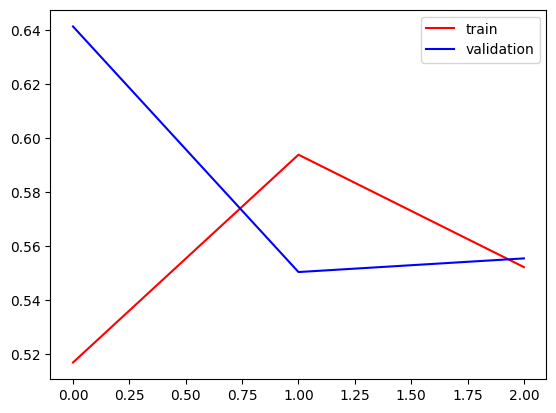

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

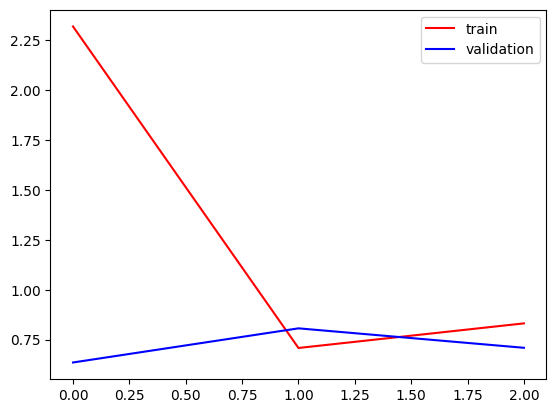

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

3/3 [==============================] - 24s 6s/step
[[0.6954334 ]
 [0.7139642 ]
 [0.54395044]
 [0.52935076]
 [0.5714532 ]
 [0.768729  ]
 [0.78568196]
 [0.9138733 ]
 [0.7083602 ]
 [0.6688605 ]
 [0.98090804]
 [0.8744797 ]
 [0.74079984]
 [0.7942906 ]
 [0.7105745 ]
 [0.6431428 ]
 [0.9772145 ]
 [0.6994168 ]
 [0.6208246 ]
 [0.60874957]
 [0.70016557]
 [0.8621443 ]
 [0.5180948 ]
 [0.7151665 ]
 [0.6726866 ]
 [0.8088    ]
 [0.60378534]
 [0.4237574 ]
 [0.80451906]
 [0.8184943 ]
 [0.7986377 ]
 [0.70379424]
 [0.578076  ]
 [0.7803581 ]
 [0.7193077 ]
 [0.8807884 ]
 [0.93190885]
 [0.81130916]
 [0.69069463]
 [0.5292845 ]
 [0.6689644 ]
 [0.7669458 ]
 [0.7427473 ]
 [0.7551448 ]
 [0.703425  ]
 [0.5243497 ]
 [0.5289246 ]
 [0.59033966]
 [0.78147876]
 [0.61237824]
 [0.683243  ]
 [0.7707146 ]
 [0.69814575]
 [0.5784006 ]
 [0.93378913]
 [0.6351948 ]
 [0.89105356]
 [0.5708527 ]
 [0.85132676]
 [0.7479424 ]
 [0.4912402 ]
 [0.6271543 ]
 [0.86443704]
 [0.4072196 ]
 [0.76869184]
 [0.69691586]
 [0.6549251 ]
 [0.7236402

In [ ]:
len(predictions)

80

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 1 39]
 [ 2 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.03      0.05        40
           1       0.49      0.95      0.65        40

    accuracy                           0.49        80
   macro avg       0.41      0.49      0.35        80
weighted avg       0.41      0.49      0.35        80

